In [1]:
#!pip install tensorflow

In [2]:

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split


In [3]:
#CLASSIFICATION USING TWO DIFFERENT ALGORITHMS
#importing and reading the dataset
fnd = pd.read_csv("AuctionData.csv")

In [4]:
#showing number of rows and columns
fnd.shape

(2043, 9)

In [5]:
#to bring out the first five rows and column
fnd.head()

,process_b1_capacity,process_b2_capacity,process_b3_capacity,process_b4_capacity,property_price,property_product,property_winner,verification_result,verification_time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


In [6]:
#to get information about the class and object of the dataset
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process_b1_capacity  2043 non-null   int64  
 1   process_b2_capacity  2043 non-null   int64  
 2   process_b3_capacity  2043 non-null   int64  
 3   process_b4_capacity  2043 non-null   int64  
 4   property_price       2043 non-null   int64  
 5   property_product     2043 non-null   int64  
 6   property_winner      2043 non-null   int64  
 7   verification_result  2043 non-null   bool   
 8   verification_time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


In [7]:
#further dataset insight
fnd.describe()

,process_b1_capacity,process_b2_capacity,process_b3_capacity,process_b4_capacity,property_price,property_product,property_winner,verification_time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,10876.638890
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,44130.520830


In [8]:
fnd.describe(include='all')

,process_b1_capacity,process_b2_capacity,process_b3_capacity,process_b4_capacity,property_price,property_product,property_winner,verification_result,verification_time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043,2043.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781,NaN
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,NaN,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,NaN,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,NaN,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,NaN,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,NaN,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,NaN,10876.638890


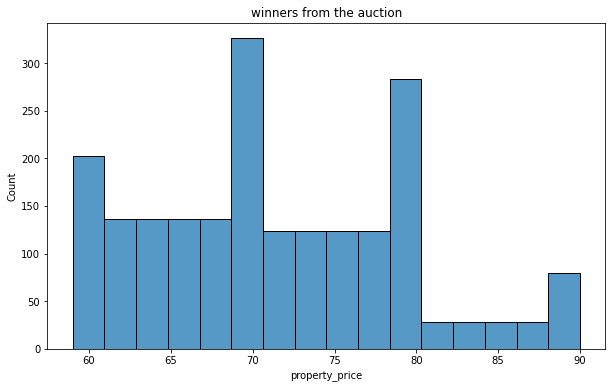

In [9]:
#exploring the distribution of the dataset using histogram
plt.figure(figsize =(10,6))
sns.histplot(fnd.property_price)
plt.title('winners from the auction')
plt.show()

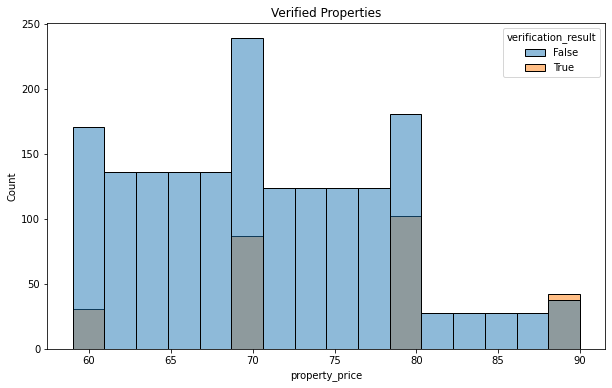

In [10]:
#checking the distribution of verification based on property price
plt.figure(figsize =(10,6))
sns.histplot(x ='property_price', hue = "verification_result", data = fnd)
plt.title('Verified Properties')
plt.show()

In [11]:
#from the output verification_result is a categorical value, here we encode to numerical value
#first we get the unique value of the column
fnd.verification_result.unique()

array([False,  True])

In [12]:
#encoding the column to numerical
fnd['verification_result']=fnd['verification_result'].replace([False, True],[0,1])

In [13]:
#checking if changes was applied to the dataset
fnd.head()

,process_b1_capacity,process_b2_capacity,process_b3_capacity,process_b4_capacity,property_price,property_product,property_winner,verification_result,verification_time
0,0,0,2,1,59,1,0,0,163.316667
1,0,0,2,1,59,2,0,0,200.860000
2,0,0,2,1,59,4,0,0,154.888889
3,0,0,2,1,59,6,0,0,108.640000
4,0,0,2,1,60,1,0,1,85.466667


In [14]:
fnd.tail()

,process_b1_capacity,process_b2_capacity,process_b3_capacity,process_b4_capacity,property_price,property_product,property_winner,verification_result,verification_time
2038,2,3,2,1,90,5,0,1,82.425000
2039,2,3,2,1,90,5,1,1,1316.983333
2040,2,3,2,1,90,5,2,0,9365.450000
2041,2,3,2,1,90,5,3,0,8474.025000
2042,2,3,2,1,90,5,4,1,82.008333


In [15]:
#CLASSIFICATION
#here verification_result is as a categorical data is our dependent variable/column
#I want to predict the class outcome/output based on the remaining independent variables/columns
#I want to know the degree of verification level based on the 5 input columns
#X = fnd.iloc[:,[0,1,2,3,4,5,6]].values
#y = fnd.iloc[:,7].values

In [16]:
#here the data was separated into training and test data using train_test_split
from sklearn.model_selection import train_test_split
X = fnd.drop('verification_result',axis=1)
y = fnd['verification_result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state = 0)

In [17]:
#scaling of the training data and fitting it for transformation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [18]:
#using KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski', p=2)
classifier.fit(X_train_s,y_train)

KNeighborsClassifier()

In [19]:
#making a prediction
y_pred=classifier.predict(X_test_s)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [20]:
print(y_test)

1386    0
386     0
1449    0
721     0
1474    0
       ..
1184    0
319     0
184     1
898     0
1433    0
Name: verification_result, Length: 613, dtype: int64


In [43]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('---------------------------------------------')
result = metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.91


Confusion Matrix:
[[342  15]
 [ 23  29]] 


---------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       357
           1       0.66      0.56      0.60        52

    accuracy                           0.91       409
   macro avg       0.80      0.76      0.78       409
weighted avg       0.90      0.91      0.90       409



In [39]:
#printing the precision and recalls of the classifier
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds = precision_recall_curve(y_test,y_pred)

In [40]:
precision

array([0.12713936, 0.65909091, 1.        ])

In [41]:
recall

array([1.        , 0.55769231, 0.        ])

In [42]:
thresholds

array([0, 1], dtype=int64)

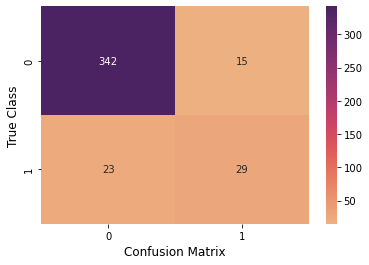

In [44]:
ax = sns.heatmap(cm,cmap = 'flare', annot = True, fmt = 'd')

plt.xlabel('Predicted Class',fontsize=12)
plt.ylabel('True Class',fontsize=12)
plt.xlabel('Confusion Matrix',fontsize=12)
plt.show()
        

In [23]:
#using Neural network classification algorithm
#checking for class imbalance using count and snsplot
fnd['verification_result'].value_counts()

0    1781
1     262
Name: verification_result, dtype: int64

e:\Ana3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verification_result', ylabel='count'>

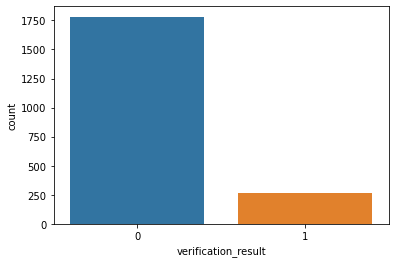

In [24]:
#There was a class inbalance of 87.2% belonging to normal class, we further use snsplot to visualize it
#There was a class inbalance of 18.8% belonging to suspect class
sns.countplot(fnd['verification_result'])

In [46]:
#here the data was separated into training and test data using train_test_split
#using StandardScaler estimator to scale the mean of the data to be 0 and standard deviation to be 1.
X1 = fnd.drop('verification_result',axis=1)
y1 = fnd['verification_result']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size =0.2, stratify=y, random_state=99)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
#using a denser layer to build and train the neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12,activation='relu',input_shape=(8,)))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [48]:
#Model compilation using optimizer and loss functions
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',metrics='accuracy')

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 12)                108       
                                                                 
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 12)                156       
                                                                 
 dense_10 (Dense)            (None, 12)                156       
                                                                 
 dense_11 (Dense)            (None, 12)                156       
                                                                 
 dense_12 (Dense)            (None, 12)                156       
                                                                 
 dense_13 (Dense)            (None, 3)                

In [50]:
##training by fitting in model for transformation
#using the inverse proportion of the observations
class_weights = {0:1, 1:2}
history = model.fit(X_train, y_train, \
    batch_size = 0, epochs= 50, \
        verbose=2, class_weight=class_weights, \
            validation_split=0.2)

Epoch 1/50
41/41 - 2s - loss: 1.1322 - accuracy: 0.8409 - val_loss: 0.8242 - val_accuracy: 0.8838 - 2s/epoch - 48ms/step
Epoch 2/50
41/41 - 0s - loss: 0.8247 - accuracy: 0.8684 - val_loss: 0.4190 - val_accuracy: 0.8838 - 124ms/epoch - 3ms/step
Epoch 3/50
41/41 - 0s - loss: 0.5936 - accuracy: 0.8684 - val_loss: 0.3547 - val_accuracy: 0.8838 - 139ms/epoch - 3ms/step
Epoch 4/50
41/41 - 0s - loss: 0.5191 - accuracy: 0.8623 - val_loss: 0.3495 - val_accuracy: 0.8716 - 117ms/epoch - 3ms/step
Epoch 5/50
41/41 - 0s - loss: 0.4910 - accuracy: 0.8577 - val_loss: 0.3217 - val_accuracy: 0.8654 - 119ms/epoch - 3ms/step
Epoch 6/50
41/41 - 0s - loss: 0.4699 - accuracy: 0.8585 - val_loss: 0.3453 - val_accuracy: 0.8349 - 119ms/epoch - 3ms/step
Epoch 7/50
41/41 - 0s - loss: 0.4625 - accuracy: 0.8439 - val_loss: 0.3056 - val_accuracy: 0.8532 - 116ms/epoch - 3ms/step
Epoch 8/50
41/41 - 0s - loss: 0.4487 - accuracy: 0.8539 - val_loss: 0.3357 - val_accuracy: 0.8287 - 127ms/epoch - 3ms/step
Epoch 9/50
41/41 -

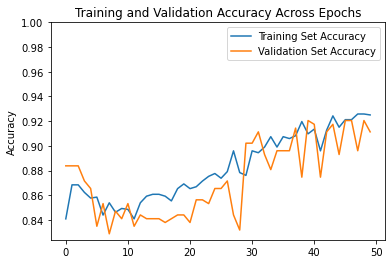

In [65]:
#Neutral network evaluation and plotting
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

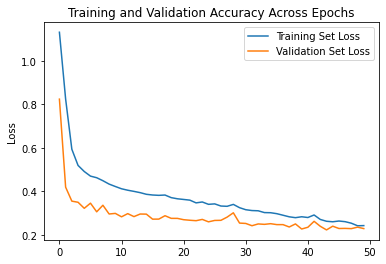

In [66]:
#plot for training and validation loss
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
#making a prediction
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

13/13 [==============================] - 0s 1ms/step


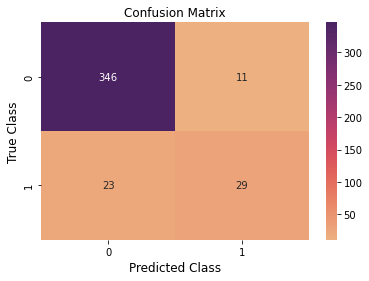

In [62]:
#visualizing result
confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [63]:
#printing the model summary of the result
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       357
           1       0.72      0.56      0.63        52

    accuracy                           0.92       409
   macro avg       0.83      0.76      0.79       409
weighted avg       0.91      0.92      0.91       409

